# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [104]:
employee = pd.read_csv('Employee.csv')
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [4]:
employee.pivot_table(index = 'Department', values = 'Salary', aggfunc = np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [5]:
employee.groupby(['Department'])['Salary'].agg(['mean'])

,mean
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [84]:
mean_salary_department_title = employee.pivot_table(index = ['Department', 'Title'], values = 'Salary', aggfunc = np.mean, fill_value = 'N/A')
mean_salary_department_title.rename(columns = {'Salary': 'Mean Salary'}, inplace = True)
mean_salary_department_title

Mean Salary
Department Title                 
HR         VP                70.0
           analyst           32.5
IT         VP                70.0
           analyst           32.5
           associate         60.0
Sales      associate         55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [7]:
employee.pivot_table(index ='Title', columns =  'Years', values = 'Salary', aggfunc = np.mean, fill_value = 'N/A')

Years,1,2,3,4,7,8
Title,,,,,,
VP,N/A,N/A,N/A,N/A,N/A,70.0
analyst,35.0,30.0,N/A,35.0,N/A,N/A
associate,N/A,55.0,55.0,N/A,60.0,N/A


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [99]:
mean_salary = employee.groupby(['Department', 'Title']).agg({'Salary': ['mean', 'count']})
mean_salary.rename(columns = {'mean': 'Mean Salary', 'count': 'Number of Employees'}, inplace = True)
mean_salary

Salary                    
                     Mean Salary Number of Employees
Department Title                                    
HR         VP               70.0                   1
           analyst          32.5                   2
IT         VP               70.0                   1
           analyst          32.5                   2
           associate        60.0                   1
Sales      associate        55.0                   2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [198]:
results = employee.groupby(['Department', 'Title']).agg({'Salary': ['mean', 'min', 'max', 'std']})
results

Salary                  
                       mean min max       std
Department Title                             
HR         VP          70.0  70  70       NaN
           analyst     32.5  30  35  3.535534
IT         VP          70.0  70  70       NaN
           analyst     32.5  30  35  3.535534
           associate   60.0  60  60       NaN
Sales      associate   55.0  55  55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [204]:
results.fillna('N/A')

Salary                  
                       mean min max       std
Department Title                             
HR         VP          70.0  70  70       N/A
           analyst     32.5  30  35  3.535534
IT         VP          70.0  70  70       N/A
           analyst     32.5  30  35  3.535534
           associate   60.0  60  60       N/A
Sales      associate   55.0  55  55       0.0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [80]:
spend_on_salaries = employee.groupby(['Department'])['Salary'].agg(['sum', 'count'])
spend_on_salaries['Total Spend'] = spend_on_salaries['sum'].mul(spend_on_salaries['count'])
spend_on_salaries.rename(columns = {'count': 'Number of Employees'}, inplace = True)
spend_on_salaries[['Number of Employees', 'Total Spend']]

,Number of Employees,Total Spend
Department,,
HR,3,405
IT,4,780
Sales,2,220


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [93]:
experience_salary = employee.groupby(['Department', 'Title']).agg({'Salary':'mean', 'Years': 'sum'})
experience_salary.rename(columns = {'Salary': 'Mean Salary', 'Years': 'Years of Experience'}, inplace = True)
experience_salary[['Years of Experience', 'Mean Salary']]

Years of Experience  Mean Salary
Department Title                                      
HR         VP                           8         70.0
           analyst                      6         32.5
IT         VP                           8         70.0
           analyst                      3         32.5
           associate                    7         60.0
Sales      associate                    5         55.0

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [230]:
analisis = employee.pivot_table(index ='Department', values = 'Salary', aggfunc = np.max, fill_value = 'N/A')
analisis

,Salary
Department,
HR,70
IT,70
Sales,55


In [231]:
llave = list(analisis.index)
valor = list(analisis.Salary)
diccionario = dict(zip(llave, valor))
diccionario

{'HR': 70, 'IT': 70, 'Sales': 55}

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [102]:
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [101]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [103]:
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [120]:
fitbit.corr().loc[['Steps'], ['Minutes Very Active']]

,Minutes Very Active
Steps,0.571452


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [118]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

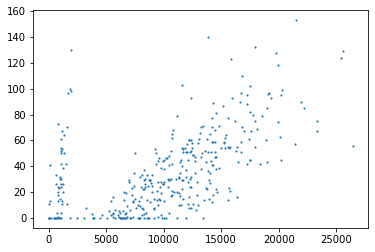

In [132]:
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'], marker = '.', s = 5)
plt.scatter

#### What can you say about Minute Very Active and Steps? Write a comment below

In [135]:
# Las variables 'steps' y 'minutes very active' tienen una correlación positiva (0.57) y una relación lineal. Obviamente existen outliers que habría que indagar.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [136]:
fitbit.corr().loc[['Steps'], ['Minutes Sedentary']]

,Minutes Sedentary
Steps,0.076906


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

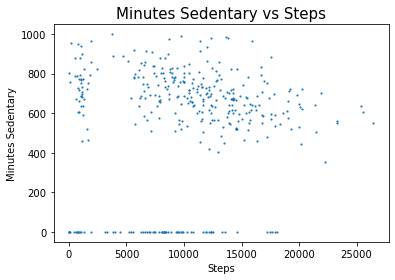

In [195]:
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Sedentary'], marker = '.', s = 5)
plt.title('Minutes Sedentary vs Steps', fontsize = 15)
plt.xlabel('Steps', fontsize = 10)
plt.ylabel('Minutes Sedentary', fontsize = 10, rotation = 90)
plt.scatter

In [206]:
# Estas variables no están linealmente relacionadas, ya que su correlación es cercana a 0 (0.076). Podemos ver además, que los datos están muy dispersos.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [141]:
fitbit.corr().loc[['MinutesOfSleep'], ['Steps']]

,Steps
MinutesOfSleep,0.130986


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

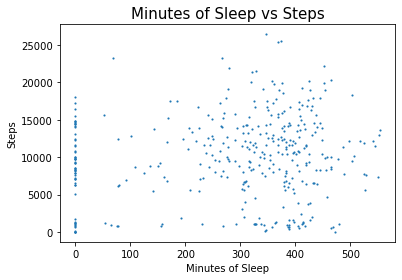

In [194]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'], marker = '.', s = 5)
plt.title('Minutes of Sleep vs Steps', fontsize = 15)
plt.xlabel('Minutes of Sleep', fontsize = 10)
plt.ylabel('Steps', fontsize = 10, rotation = 90)
plt.scatter

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [147]:
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()

In [168]:
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [161]:
cor_fit['Steps'].sort_values(ascending = False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [169]:
time_grades = pd.read_csv('Time_Grades.csv')

In [171]:
time_grades.head(3)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9


#### Show visually the frequency distribution of the time_grades dataset.

array([[<AxesSubplot:title={'center':'Study time'}>,
        <AxesSubplot:title={'center':'Grade'}>]], dtype=object)

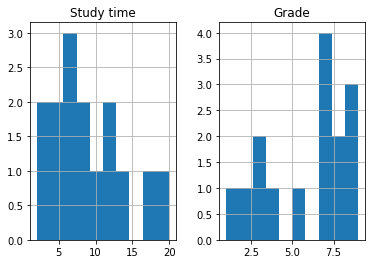

In [174]:
time_grades.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [180]:
time_grades.corr().loc[['Study time'], ['Grade']]

,Grade
Study time,0.798046


In [183]:
time_grades.corr('spearman').loc[['Study time'], ['Grade']]

,Grade
Study time,0.819659


In [208]:
# Efectivamente hay una relación lineal entre estas 2 variables, ya que el valor de la correlación es cercana a 1, por lo que están directamente relacionadas.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

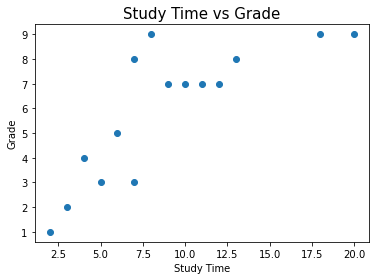

In [196]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.title('Study Time vs Grade', fontsize = 15)
plt.xlabel('Study Time', fontsize = 10)
plt.ylabel('Grade', fontsize = 10, rotation = 90)
plt.scatter

In [209]:
# Podemos ver que mientras mayor es el grado, mayor es el tiempo de estudio.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [210]:
# Pearson mide solamente si la correlación es lineal o no. Por otro lado, Spearman mide la correlación cuando la correlación de los datos no son necesariamiente lineales